# Matplotlib and pylab inline

In [1]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Import libraries

In [2]:
import os
import cv2 as cv
import matplotlib.pyplot as plt

from matplotlib import rcParams
from modules.reading import *
from modules.standardization import standardize_image
from modules.preprocessing import preproc_image
from modules.noise import get_scalar_product_precentiles
from modules.holes import get_horizontal_vertical_mean_percentiles
from modules.pants import r_max_and_ds_percentiles

from pandas import DataFrame

rcParams["figure.dpi"] = 100
rcParams["figure.figsize"] = (4, 5)
rcParams["image.cmap"] = "gray"

## Read image

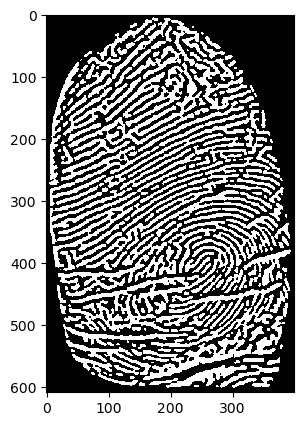

In [3]:
im = read_random_image(RAW_FILE_PATH_GOODIM)
std_im = standardize_image(im)
prep_im = preproc_image(std_im)

plt.imshow(prep_im)
plt.show()

In [4]:
get_scalar_product_precentiles(prep_im)

array([-0.66674189,  0.71282332,  0.89425804,  0.96510489])

In [5]:
get_horizontal_vertical_mean_percentiles(prep_im)

array([ 96.9       , 114.1125    , 131.325     , 165.1125    ,
        98.81773399, 115.56650246, 127.29064039, 138.1773399 ,
        96.5175    , 116.6625    , 134.5125    , 161.925     ,
       102.62807882, 115.98522167, 126.87192118, 138.59605911])

In [6]:
r_max_and_ds_percentiles(prep_im)

array([0.05225798, 0.07201642, 0.16609153, 0.04624032, 0.05874611,
       0.08744533, 0.08211895, 0.12876861, 0.17173384, 4.        ,
       4.        , 7.        , 4.        , 4.        , 9.        ,
       4.        , 4.        , 7.        ])

In [7]:
def features(im, sp_ksize=13, sp_precs=[0, 20, 40, 60], hv_percs=[30, 60, 90, 100],
             r_percs=[90, 95, 100], ds_percs=[90, 95, 100]):
    feats = np.array([])
    
    sp = get_scalar_product_precentiles(im, ksize=sp_ksize, percs=sp_precs)
    hv_means = get_horizontal_vertical_mean_percentiles(im, percs=hv_percs)
    rds = r_max_and_ds_percentiles(im, r_percs=r_percs, ds_percs=ds_percs)
    
    feats = np.append(feats, sp)
    feats = np.append(feats, hv_means)
    feats = np.append(feats, rds)
    
    return feats

In [8]:
features(prep_im)

array([-6.66741889e-01,  7.12823325e-01,  8.94258042e-01,  9.65104889e-01,
        9.69000000e+01,  1.14112500e+02,  1.31325000e+02,  1.65112500e+02,
        9.88177340e+01,  1.15566502e+02,  1.27290640e+02,  1.38177340e+02,
        9.65175000e+01,  1.16662500e+02,  1.34512500e+02,  1.61925000e+02,
        1.02628079e+02,  1.15985222e+02,  1.26871921e+02,  1.38596059e+02,
        5.22579801e-02,  7.20164188e-02,  1.66091531e-01,  4.62403196e-02,
        5.87461140e-02,  8.74453327e-02,  8.21189499e-02,  1.28768607e-01,
        1.71733837e-01,  4.00000000e+00,  4.00000000e+00,  7.00000000e+00,
        4.00000000e+00,  4.00000000e+00,  9.00000000e+00,  4.00000000e+00,
        4.00000000e+00,  7.00000000e+00])

# Use Linear SVC for image classification

## Function for getting data

In [9]:
def get_xy_ims(filepath, images, x, y, y_val=1):
    
    for name in os.listdir(filepath):
        path = filepath + name
        im = cv.imread(path, cv.IMREAD_GRAYSCALE)
        
        if path == None:
            continue
        
        std_im = standardize_image(im)
        prep_im = preproc_image(std_im)
        percentiles = features(prep_im)

        images.append(prep_im)
        x.append(percentiles)
        y.append(y_val)
    

## Get data

In [10]:
images, x, y = [], [], []


get_xy_ims(RAW_FILE_PATH_GOODIM, images, x, y)
get_xy_ims(RAW_FILE_PATH_SCANS, images, x, y)
get_xy_ims(RAW_FILE_PATH_BADIM_PANTS, images, x, y, y_val=0)
get_xy_ims(RAW_FILE_PATH_BADIM_HOLES, images, x, y, y_val=0)
get_xy_ims(RAW_FILE_PATH_BADIM_NOISE, images, x, y, y_val=0)

images = np.array(images)
x = np.array(x)
y = np.array(y)

DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,-0.742563,0.799692,0.939382,0.982928,98.87625,117.3000,136.42500,172.7625,103.278997,119.106583,...,0.227514,5.0,6.0,9.0,3.0,4.0,6.0,4.0,6.0,9.0
1,-0.701168,0.894022,0.975744,0.990953,99.51375,117.9375,128.13750,145.9875,99.076433,116.536624,...,0.199319,6.0,7.0,10.0,3.0,4.0,6.0,4.0,4.0,8.0
2,-0.706244,0.852309,0.963502,0.989765,97.53750,115.3875,133.87500,168.9375,103.355072,117.850242,...,0.259615,5.0,6.0,9.0,3.0,3.0,7.0,3.0,3.0,6.0
3,-0.758531,0.847313,0.968539,0.991717,105.06000,115.3875,124.31250,166.3875,103.281005,117.852433,...,0.277545,3.0,3.0,6.0,3.0,3.0,6.0,3.0,3.0,4.0
4,-0.666742,0.712823,0.894258,0.965105,96.90000,114.1125,131.32500,165.1125,98.817734,115.566502,...,0.171734,4.0,4.0,7.0,4.0,4.0,9.0,4.0,4.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,-0.717872,0.515440,0.710598,0.828593,94.98750,112.8375,131.00625,161.2875,95.424528,115.231132,...,0.276295,4.0,5.0,8.0,4.0,5.0,8.0,4.0,4.0,8.0
118,-0.654713,0.685828,0.861936,0.940670,108.37500,118.5750,130.05000,171.4875,106.316614,118.706897,...,0.223093,3.0,4.0,6.0,3.0,4.0,7.0,3.0,4.0,7.0
119,-0.735558,0.612101,0.801560,0.903605,100.72500,116.9175,133.23750,195.7125,105.187500,122.320312,...,0.254427,4.0,4.0,7.0,4.0,4.0,7.0,3.0,3.0,8.0
120,-0.623115,0.545853,0.734804,0.846535,93.71250,116.0250,139.61250,183.6000,100.721003,120.465517,...,0.227500,6.0,7.0,12.0,3.0,4.0,7.0,5.0,6.0,12.0


## Train LinearSVC and get

Является хорошим, считается плохим [-6.71566438e-01  7.43645560e-01  9.05822606e-01  9.69497903e-01
  1.00087500e+02  1.15387500e+02  1.28775000e+02  1.78500000e+02
  1.05963108e+02  1.18092622e+02  1.27299843e+02  1.38108320e+02
  1.02637500e+02  1.16025000e+02  1.31325000e+02  1.75312500e+02
  1.05682889e+02  1.16491366e+02  1.26939560e+02  1.40510204e+02
  6.97540122e-02  7.50448586e-02  2.27040217e-01  3.58286123e-02
  4.58542786e-02  4.10081992e-01  1.89047075e-01  2.41884177e-01
  2.90010147e-01  3.00000000e+00  4.00000000e+00  7.00000000e+00
  6.00000000e+00  6.00000000e+00  1.00000000e+01  3.00000000e+00
  4.00000000e+00  8.00000000e+00]


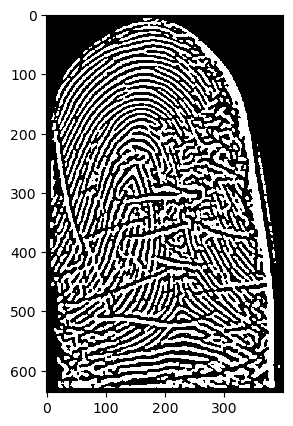

Done


In [14]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

svc = LinearSVC(max_iter=100000000)
svc.fit(x, y)

predict = svc.predict(x)
bool_predict = predict != y


for im, good, percs in zip(images[bool_predict], y[bool_predict], x[bool_predict]):
    
    if good:
        print("Является хорошим, считается плохим", percs)
    else:
        print("Является плохим, считается хорошим", percs)
    
    plt.imshow(im, cmap=plt.cm.gray)
    plt.show()
    
print("Done")

[1]


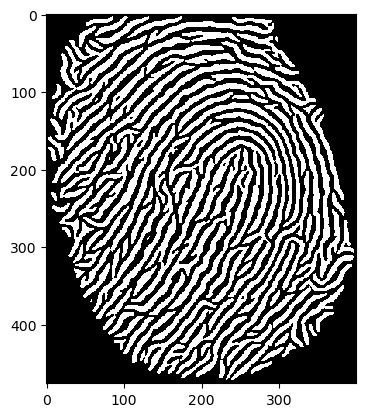

[0]


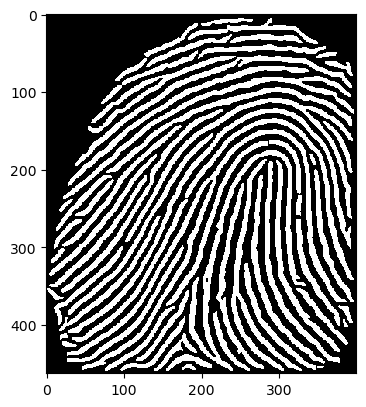

[1]


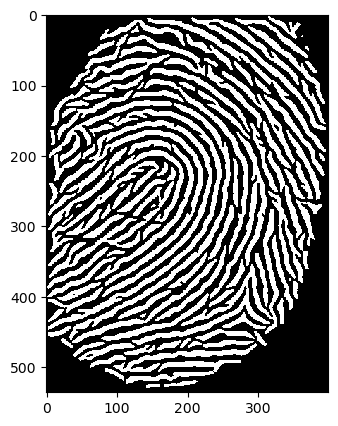

[0]


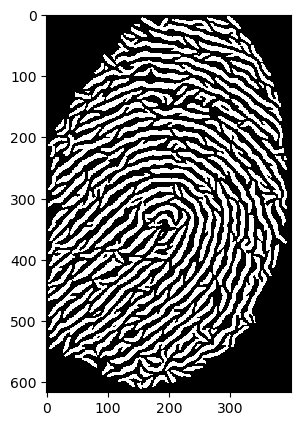

[1]


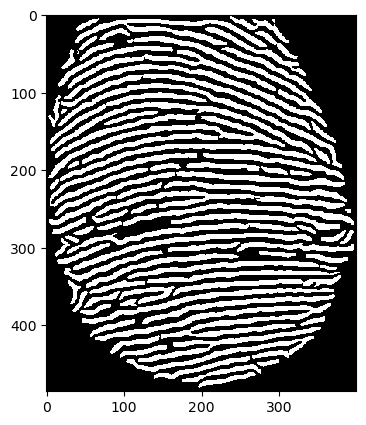

[0]


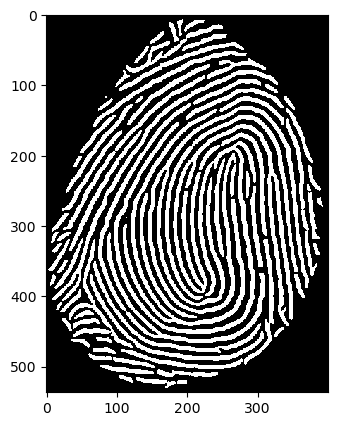

[0]


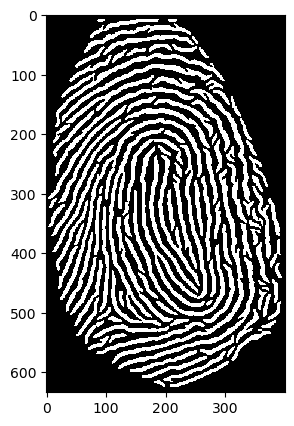

[0]


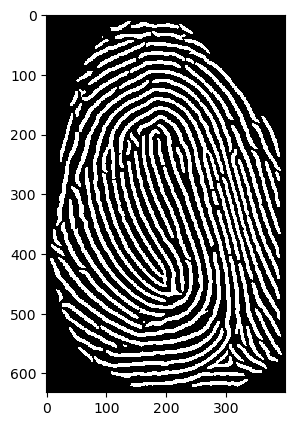

[0]


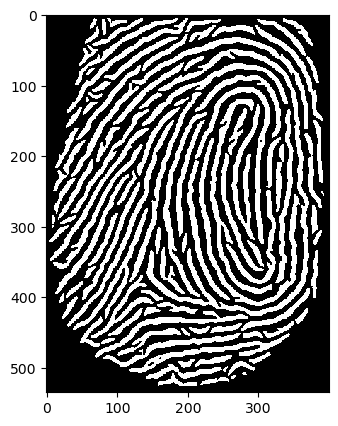

[1]


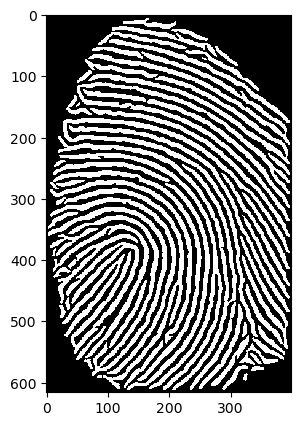

[0]


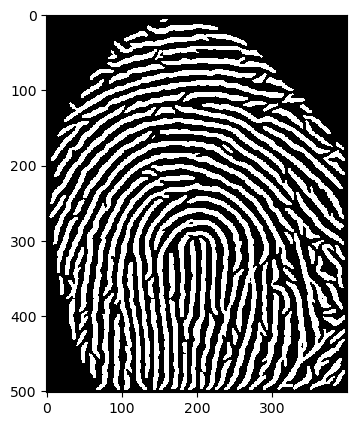

[0]


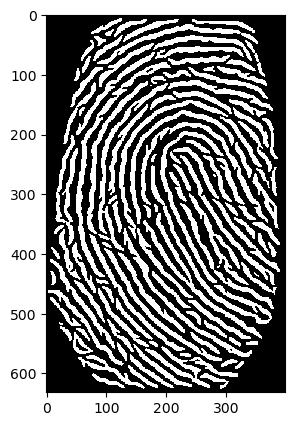

[0]


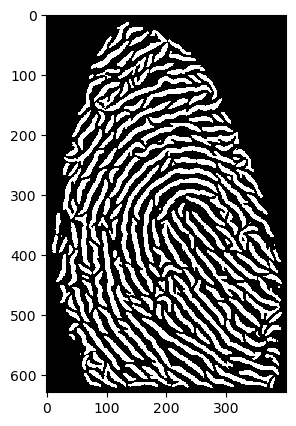

[0]


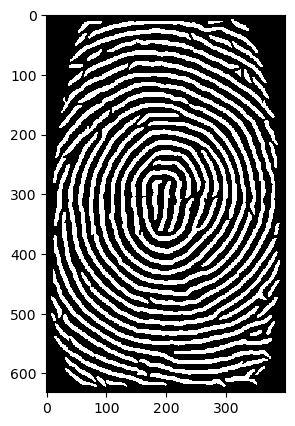

[0]


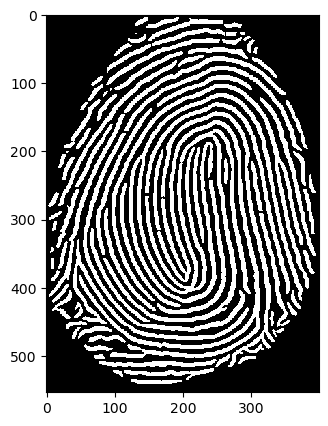

[0]


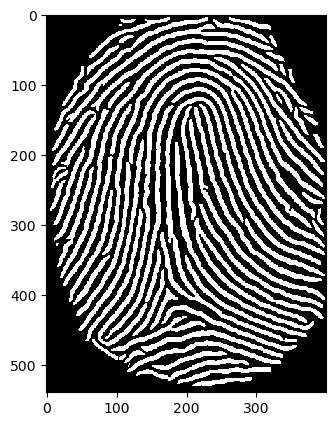

[0]


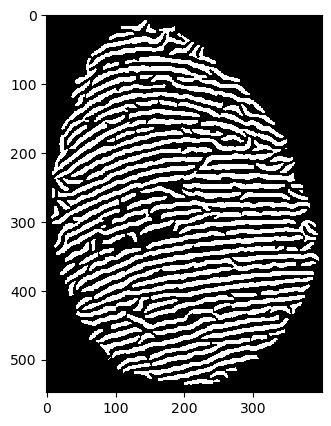

[0]


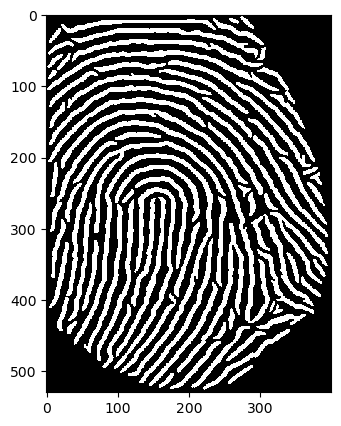

[1]


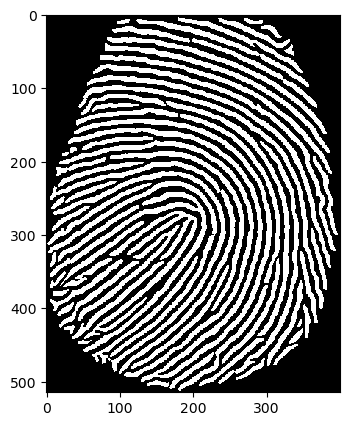

[0]


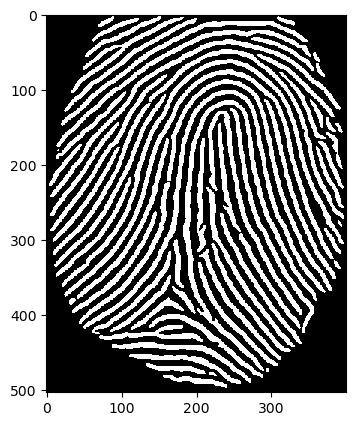

[0]


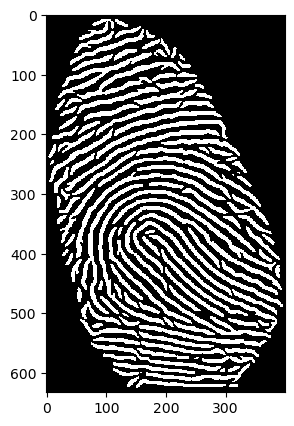

[0]


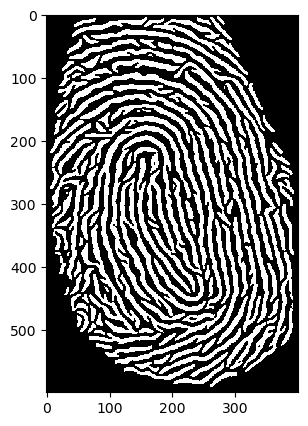

[0]


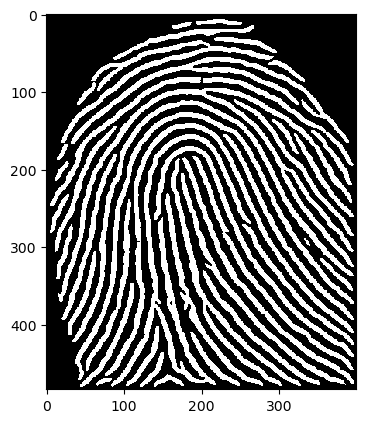

[0]


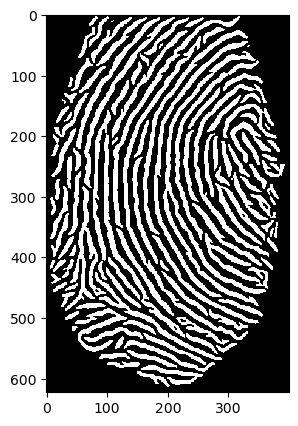

[0]


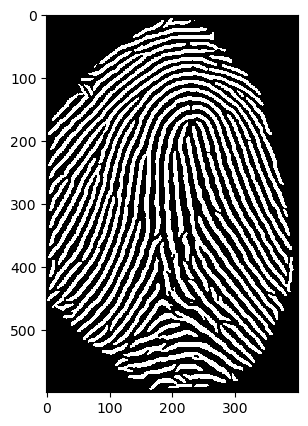

[0]


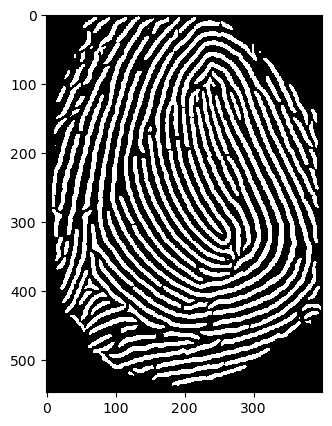

[0]


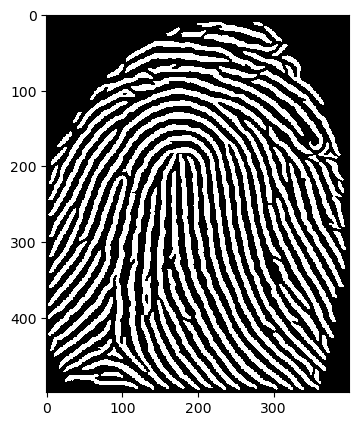

[1]


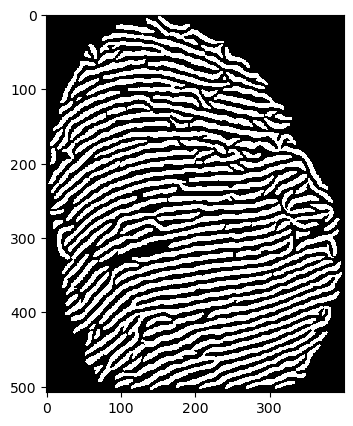

[1]


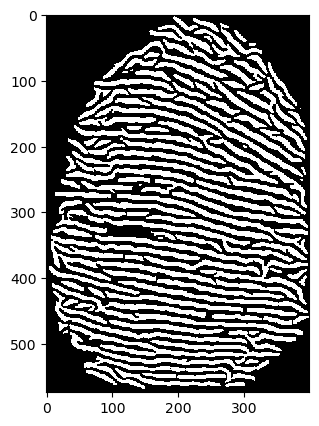

[1]


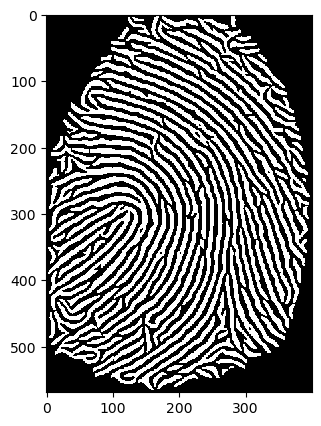

[0]


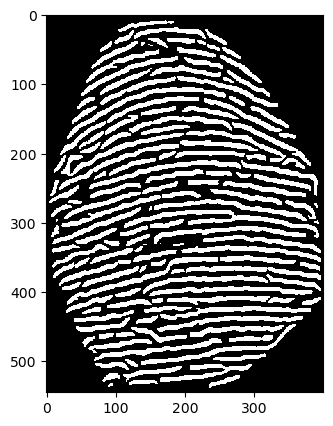

[1]


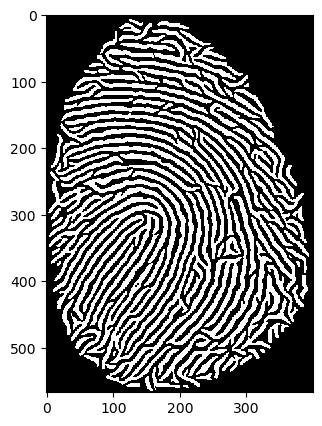

[1]


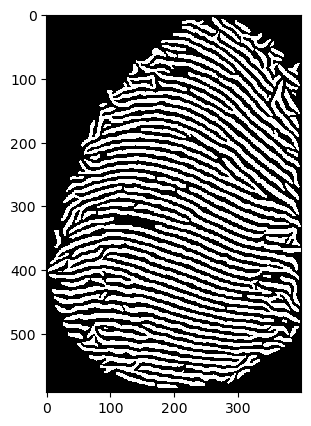

[0]


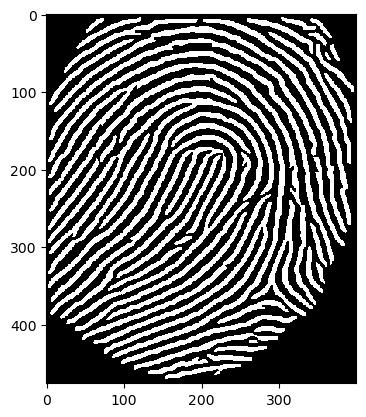

[1]


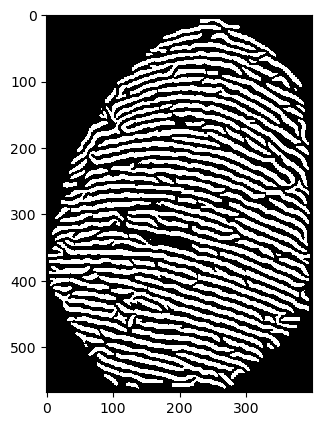

[0]


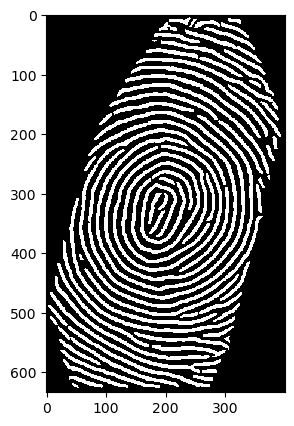

[0]


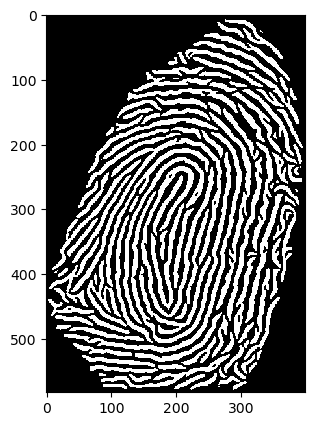

[0]


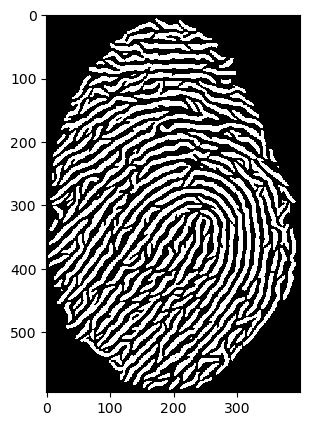

[0]


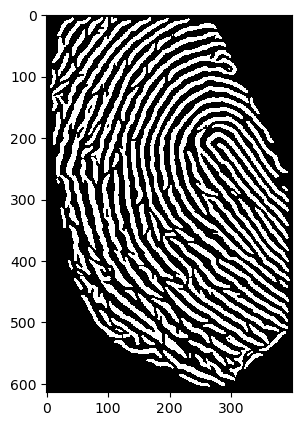

[0]


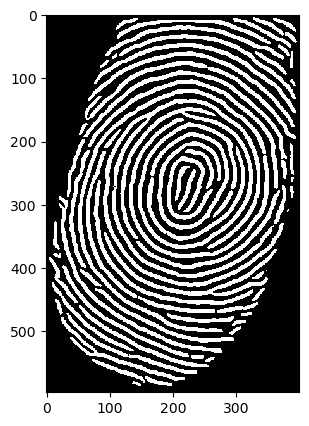

[1]


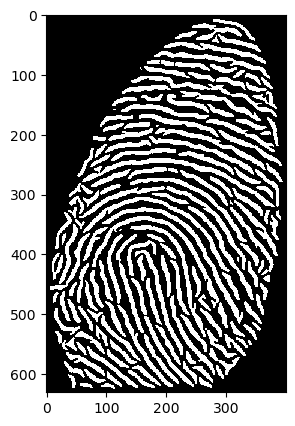

[1]


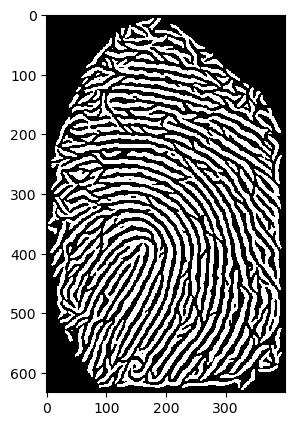

[0]


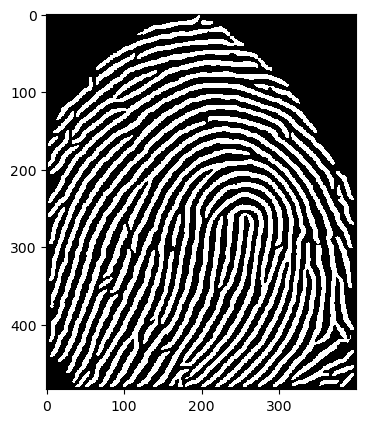

[0]


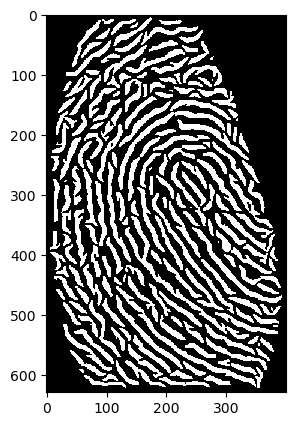

[0]


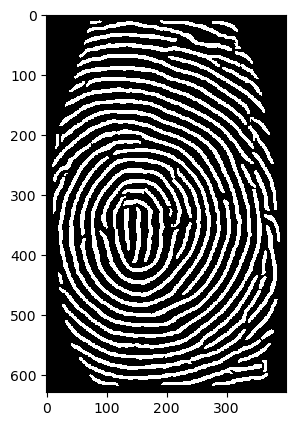

[1]


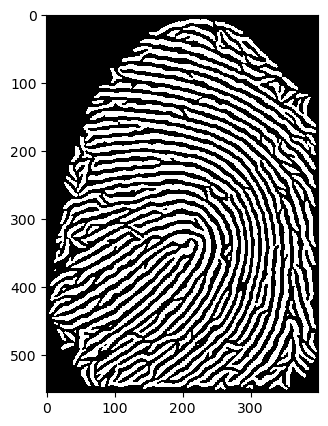

[0]


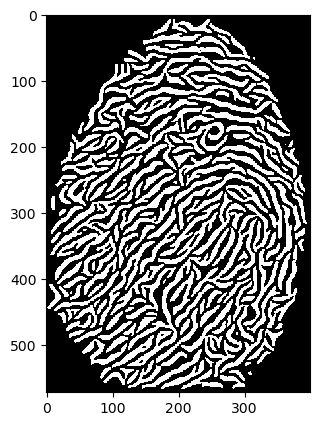

[1]


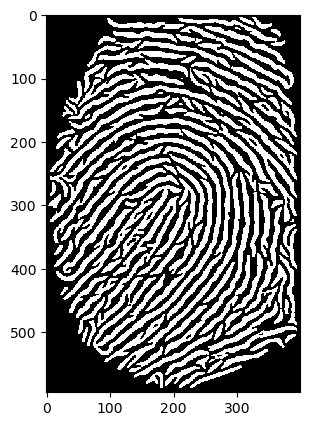

[1]


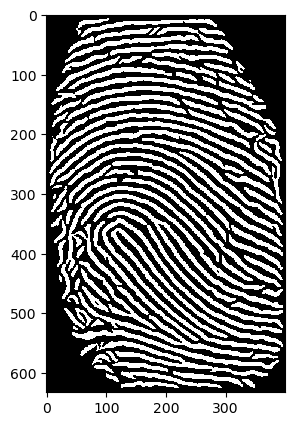

[0]


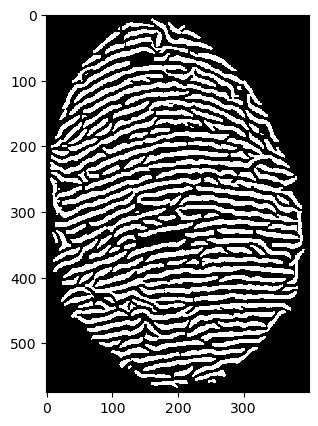

[0]


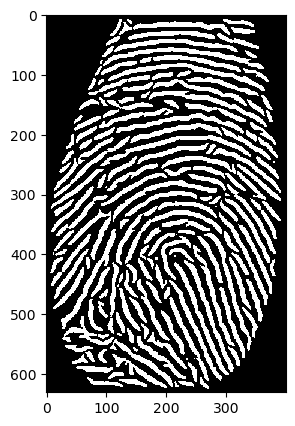

[0]


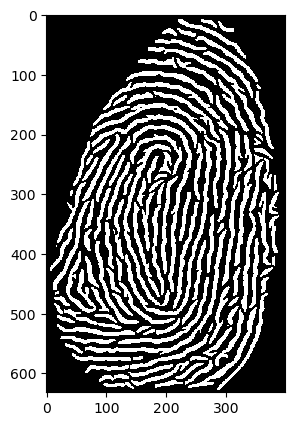

[0]


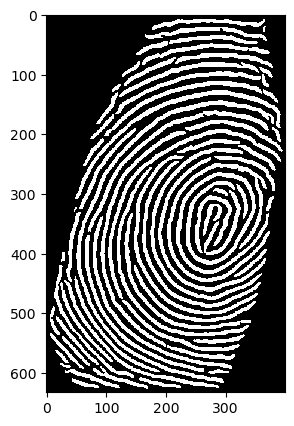

[0]


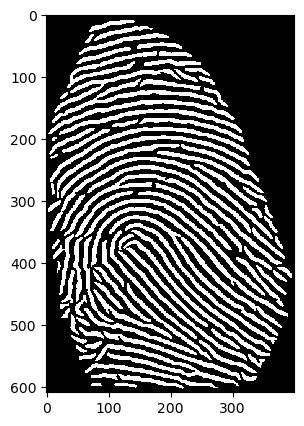

[0]


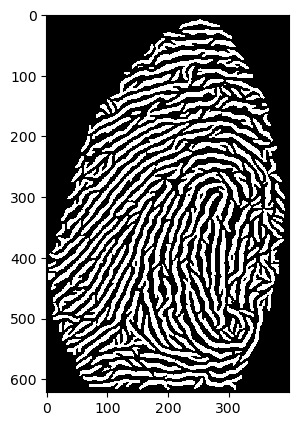

[1]


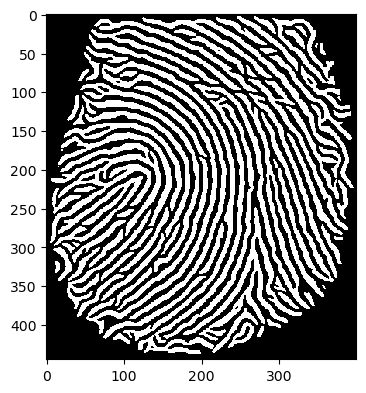

[0]


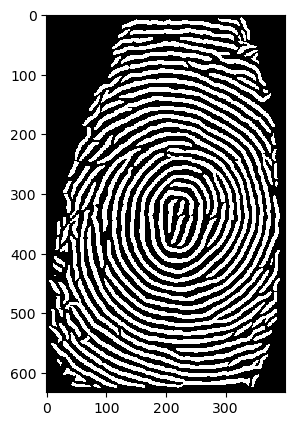

[0]


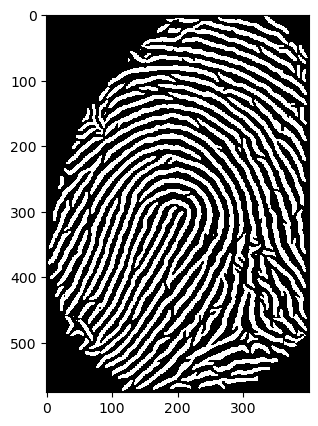

[0]


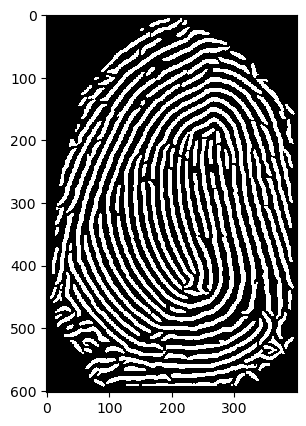

[1]


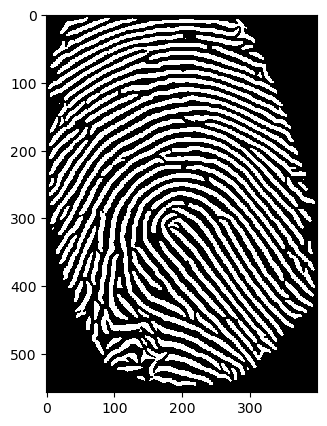

[0]


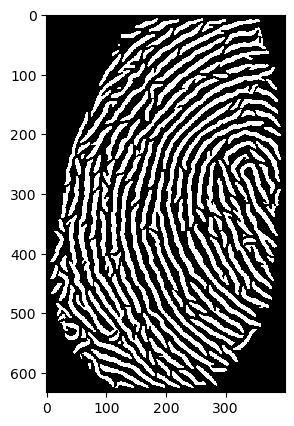

[0]


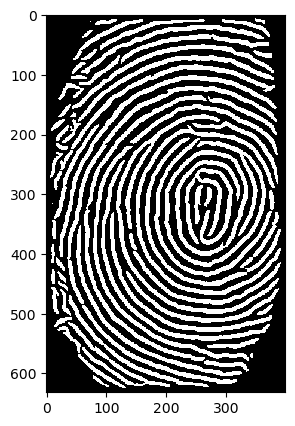

[0]


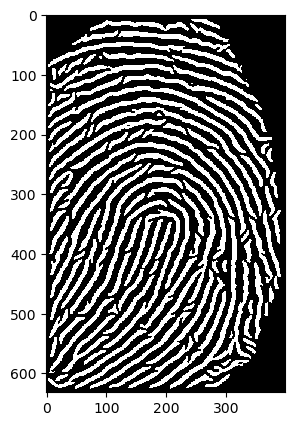

[0]


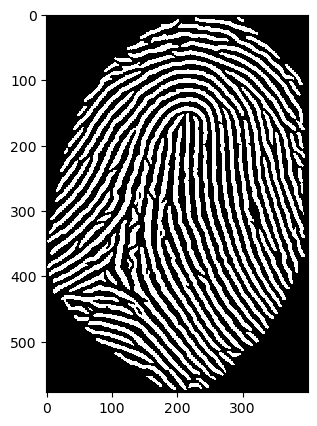

[0]


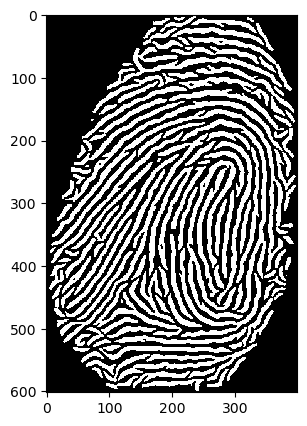

[0]


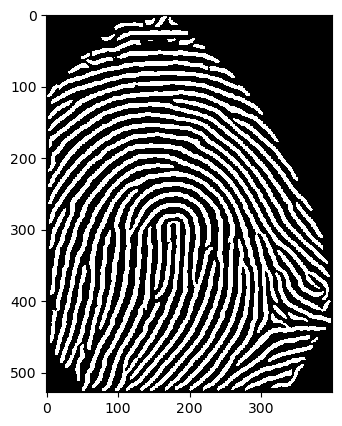

[0]


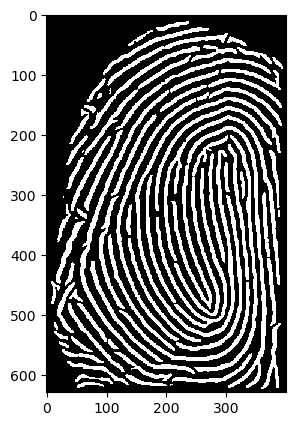

[0]


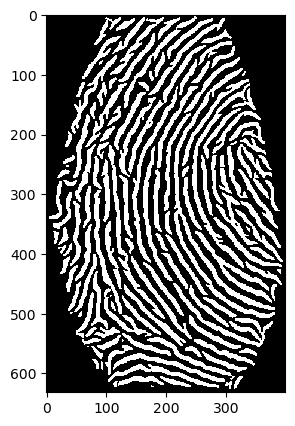

[0]


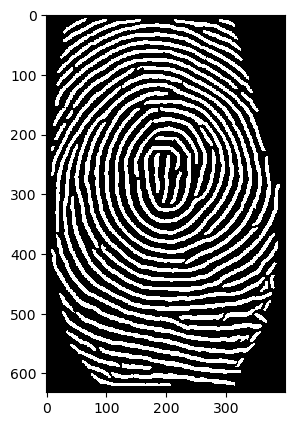

[0]


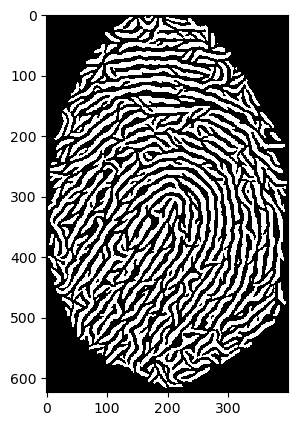

[0]


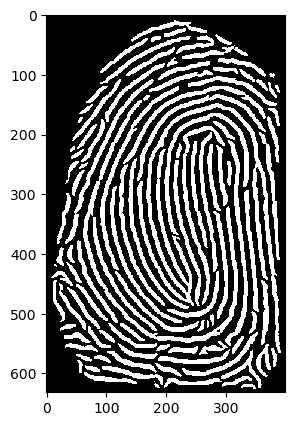

[0]


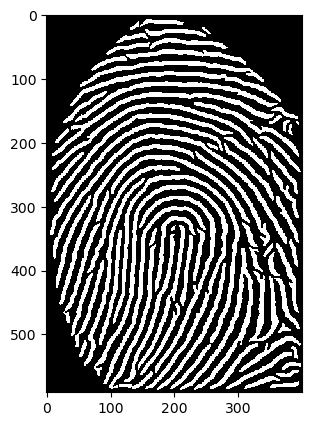

[0]


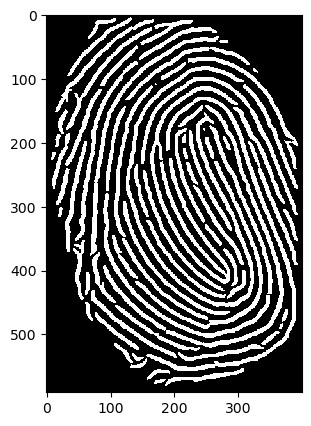

[0]


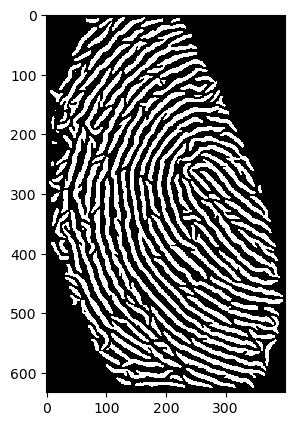

[0]


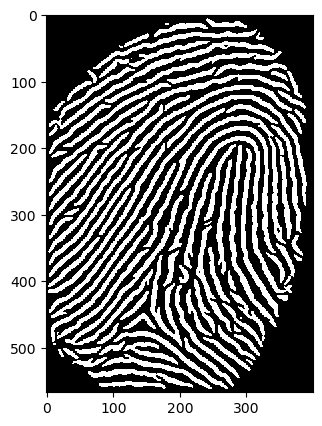

[0]


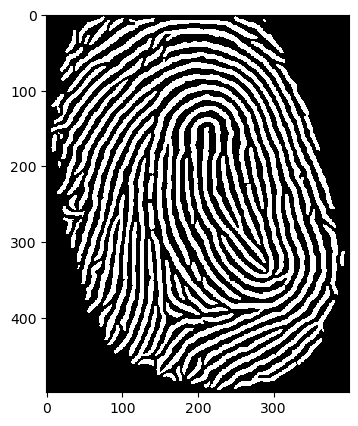

[0]


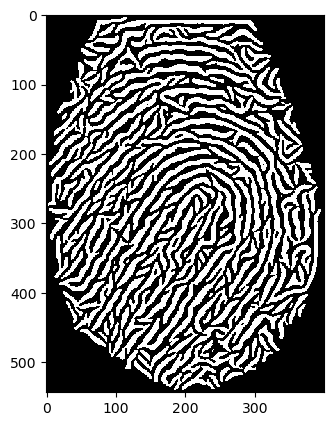

[0]


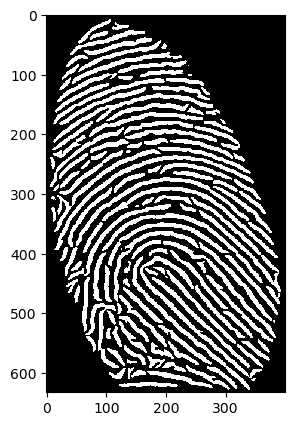

[1]


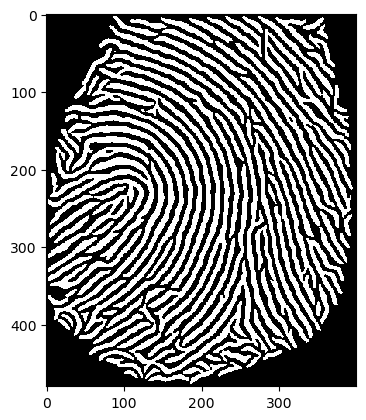

[0]


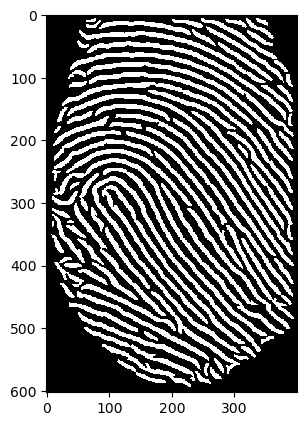

In [15]:
from modules.standardization import invers_color
from modules.preprocessing import coherence_filter

FILE_PATH = "/home/developer/Desktop/Data base fingerprints/DB4_B/"

for name in os.listdir(FILE_PATH):
        path = FILE_PATH + name
        im = cv.imread(path, cv.IMREAD_GRAYSCALE)
        
        if path == None:
            continue

        
        std_im = standardize_image(im)
        std_im = coherence_filter(std_im, n_iter=9)
        prep_im = preproc_image(std_im)
        percentiles = features(prep_im)
        
        print(svc.predict(percentiles.reshape(1, -1)))
        plt.imshow(prep_im)
        plt.show()
        
        